In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("study_performance.csv")

In [5]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,45,88
2,female,group B,master's degree,standard,none,90,23,93
3,male,group A,associate's degree,free/reduced,none,47,55,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
data['reading_score'].fillna(0, inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_912\3324476074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reading_score'].fillna(0, inplace=True)


In [8]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,45,88
2,female,group B,master's degree,standard,none,90,23,93
3,male,group A,associate's degree,free/reduced,none,47,55,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [9]:
data['reading_score'].unique()

array([ 72,  45,  23,  55,  78,  73,  87,  65,  63,  44,  32,  53,  75,
        89,  42,  58,  69,  54,  71,  74,  70,  81,  64,  90,  56,  61,
        84,  41,  85,  59,  17,  39,  80,  37,  51,  57,  49,  26,  68,
        47,  83,  86,  34,  79,  66,  67,  91, 100,  76,  77,  82,  92,
        93,  95,  62,  43,  60,  88,  50,  52,  28,  48,  46,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

In [10]:
numeric_columns = data.columns[data.dtypes != 'O']

In [11]:
numeric_columns

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [16]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,68.971000,68.054000
std,15.16308,14.700281,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


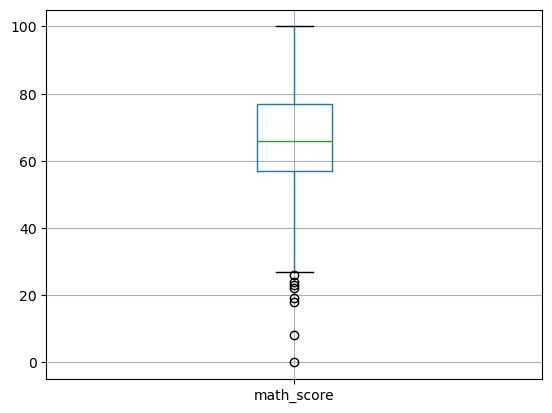

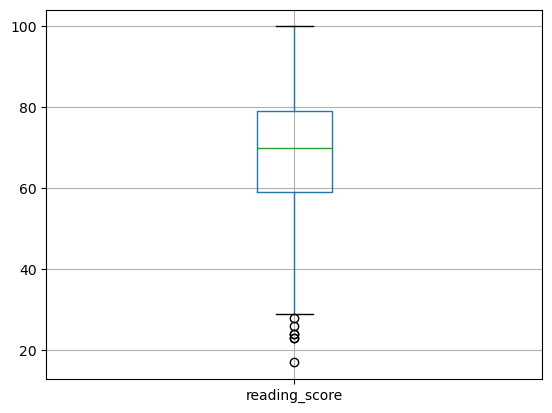

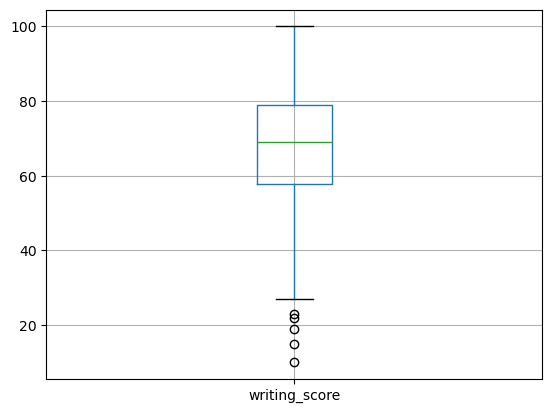

In [10]:
for i in numeric_columns:
    data.boxplot(i)
    plt.show()

In [11]:
q1 = data[['math_score','reading_score','writing_score']].quantile(0.25)
q3 = data[['math_score','reading_score','writing_score']].quantile(0.75)

IQR = q3-q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

In [12]:
clean_data = data[['math_score','reading_score','writing_score']].clip(lower = lower_bound, upper = upper_bound, axis = 1)

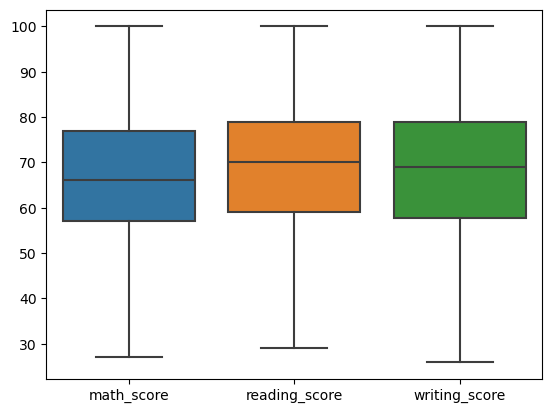

In [13]:
sns.boxplot(data = clean_data)
plt.show()

In [14]:
data['transformed_math_score'] = np.log1p(data['math_score'])

In [15]:
data['math_score'].hist(bins = 25)

<Axes: >

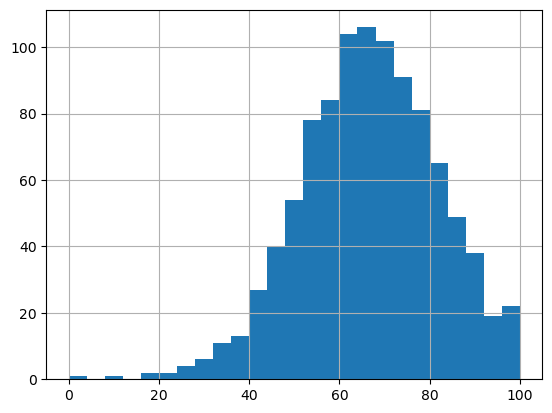

In [16]:
plt.show()

In [17]:
data['transformed_math_score'].hist(bins = 25)

<Axes: >

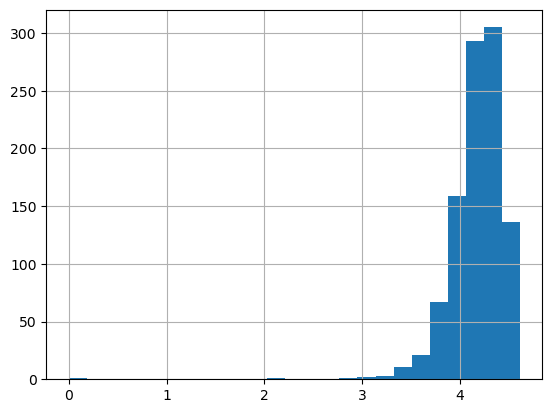

In [18]:
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


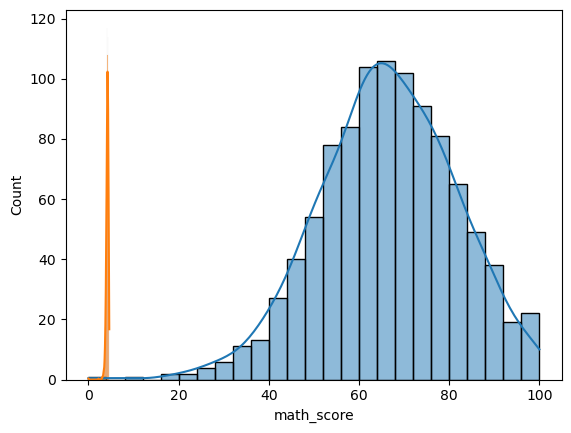

In [19]:
sns.histplot(data['math_score'], kde = True)
sns.histplot(data['transformed_math_score'], kde = True)
plt.show()